# K Nearest Neighbors - Atividade 03

Bem-vindo ao Projeto de KNN! Este será um projeto simples e muito parecido com o notebook, com a diferença de que você receberá outro conjunto de dados. Vá em frente e siga as instruções abaixo.
## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [174]:
%matplotlib inline

## Obtenha os dados
** Leia o arquivo csv 'KNN_Project_Data' em um DataFrame **

In [ ]:
drive.mount('/content/gdrive')

In [83]:
df = pd.read_csv('/content/gdrive/MyDrive/KNN_Project_Data.csv')

** Verifique o cabeçalho do DataFrame.**

In [84]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Divisão treino-teste

** Use o método train_test_split para dividir seus dados em um conjunto treino e teste.**

In [85]:
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Padronize as variáveis

Hora de para padronizar as variáveis.

** Import StandardScaler do Scikit-learn. **

** Crie um objeto StandardScaler() chamado scaler. **

In [86]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler() 

** Use o método fit() do objeto para treinar o modelo. **

In [87]:
scaler.fit(X_train[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA',	'HYKR',	'EDFS',	'GUUB',	'MGJM',	'JHZC']])

StandardScaler()

** Use o método .transform () para transformar os parâmetros em uma versão padronizada. **

In [88]:
X_train_scaled[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA',	'HYKR',	'EDFS',	'GUUB',	'MGJM',	'JHZC']] = scaler.transform(X_train[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA',	'HYKR',	'EDFS',	'GUUB',	'MGJM',	'JHZC']])
X_test_scaled[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA',	'HYKR',	'EDFS',	'GUUB',	'MGJM',	'JHZC']] = scaler.transform(X_test[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA',	'HYKR',	'EDFS',	'GUUB',	'MGJM',	'JHZC']])

** Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou. **

In [89]:
X_train_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
541,-1.594010,0.584541,-0.680589,0.885079,-0.331101,0.287269,-1.326559,0.583467,0.352073,1.651636
440,-1.478875,0.111455,-1.487069,0.478673,0.632534,-0.067932,1.287428,0.768341,1.248123,-0.786333
482,0.018348,1.832448,-0.340968,0.687772,1.152013,-0.923793,-0.521554,0.272773,0.089718,-2.203299
422,0.534513,0.331759,0.633546,0.190957,1.626781,0.501702,-0.078628,1.048279,-1.532975,-1.883207
778,-0.737274,-0.244397,0.577852,1.081180,0.667223,1.370688,-0.757630,0.664345,-0.087544,-1.752222


# Usando o KNN

** Importe o KNeighborClassifier do scikit learn. **

** Crie uma instância do modelo KNN com n_neighbors = 1 **

In [96]:
knn = KNeighborsClassifier(n_neighbors=1)

** Ajuste este modelo KNN aos dados de treinamento. **

In [97]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

# Escolhendo o valor K
Vamos continuar usando o método do cotovelo para escolher um bom valor K!

** Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Consulte o notebook se você estiver confuso nesta etapa. **

In [98]:
pred = knn.predict(X_test_scaled)

In [100]:
np.mean(pred != y_test)

0.27666666666666667

In [102]:
knn.score(X_test_scaled, y_test)

0.7233333333333334

In [126]:
error = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  error.append(1-knn.score(X_test_scaled, y_test))

** Agora crie o seguinte gráfico usando as informações do seu loop. **

Text(0, 0.5, 'Error Rate')

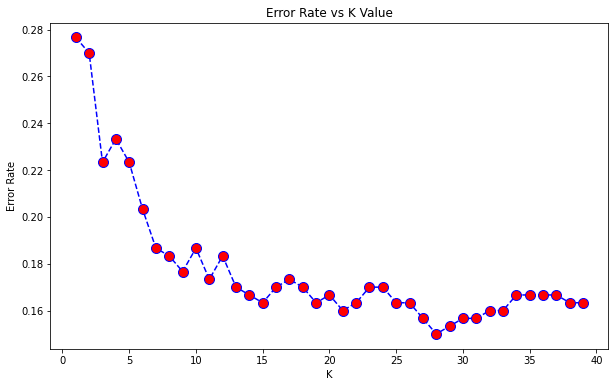

In [127]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor = 'red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [138]:
error = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  pred = knn.predict(X_test_scaled)
  error.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error Rate')

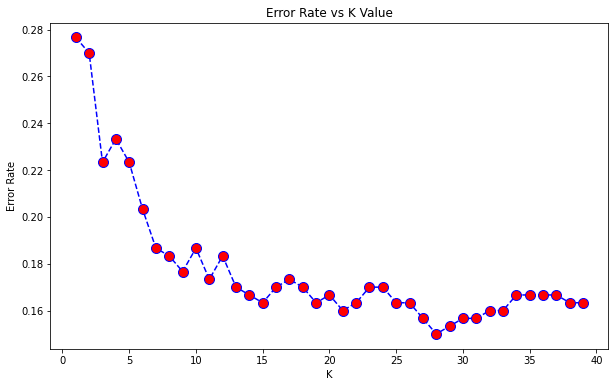

In [139]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor = 'red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Treine seu modelo novamente com novo valor K

** Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão. **

In [173]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
error = np.mean(pred != y_test)

print(error)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.16333333333333333
[[125  21]
 [ 28 126]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       146
           1       0.86      0.82      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [172]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
error = np.mean(pred != y_test)

print(error)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


0.15
[[128  18]
 [ 27 127]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       146
           1       0.88      0.82      0.85       154

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

